# Introduction

## Objective

Detailed Introduction to your project, e.g. what problem you are going to solve based on what dataset

Possible Problem:
Finding optimal number of hours for quality sleep and debunking myths of alcohol and smoking affecting sleep using data

## Significance
- briefly review the significance of your topic, e.g. any potential applciations of your project

## Organisation
- Import Libraries
- Import Data Set
- About Data Set
- Definitions
- Relationship between gender and age to sleep efficiency
- Relationships between Sleep Efficiency and Sleep Percentages
- Relationship of Sleep duration to sleep quality(3 factors)
- Relationship of lifestyle choices(bed time,caffeine,alcohol,smoke,exercise) to sleep quality(3 factors)
    select relevant lifestyle choices as factors
- Train a model to determine an average recommended sleep duration

## Importing Libraries

In [84]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Importing Data Set

In [85]:
dataset = pd.read_csv('Sleep_Efficiency.csv')
dataset.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


## About Data Set
#### The dataset contains information about a group of test subjects and their sleep patterns. 

Each test subject is identified by a unique "Subject ID" and their age and gender are also recorded. 

The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, 

and the "Sleep duration" feature records the total amount of time each subject slept in hours. 

The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. 

The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. 

The "Awakenings" feature records the number of times each subject wakes up during the night. 

Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.

## Checkpoint 2. Data Preprocessing
Detailed description on your dataset via statistics and visualization.
Detailed statements on why and how you perform data preprocessing, e.g. data cleaning, normalization, transformation, data augmentation.

## Renaming Column Headers

In [86]:
dataset = dataset.rename(columns={'ID':'id', 'Age':'age', 'Gender':'gender', 'Bedtime':'bed_time',
                                   'Wakeup time':'wakeup_time', 'Sleep duration':'sleep_duration', 
                                   'Sleep efficiency':'sleep_efficiency', 'REM sleep percentage':'rem_sleep_percentage',
                                   'Deep sleep percentage':'deep_sleep_percentage','Light sleep percentage':'light_sleep_percentage',
                                'Awakenings':'awakenings','Caffeine consumption':'caffeine_consumption','Alcohol consumption':'alcohol_consumption',
                                'Smoking status':'smoking_status','Exercise frequency':'exercise_frequency'})
dataset.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      452 non-null    int64  
 1   age                     452 non-null    int64  
 2   gender                  452 non-null    object 
 3   bed_time                452 non-null    object 
 4   wakeup_time             452 non-null    object 
 5   sleep_duration          452 non-null    float64
 6   sleep_efficiency        452 non-null    float64
 7   rem_sleep_percentage    452 non-null    int64  
 8   deep_sleep_percentage   452 non-null    int64  
 9   light_sleep_percentage  452 non-null    int64  
 10  awakenings              432 non-null    float64
 11  caffeine_consumption    427 non-null    float64
 12  alcohol_consumption     438 non-null    float64
 13  smoking_status          452 non-null    object 
 14  exercise_frequency      446 non-null    fl

## Splitting the Variable Types

#### Numerical Variables:
age
sleep_duration
sleep_efficiency


#### Categorical Variables:
gender
bedtime
wakeup_time
rem_sleep_percentage
light_sleep_percentage
smoking status
awakenings


x variables:
Age
Gender
caffeince
alcohol
smoking status
exercise frequency



## Relationship between Age and Sleep Efficiency

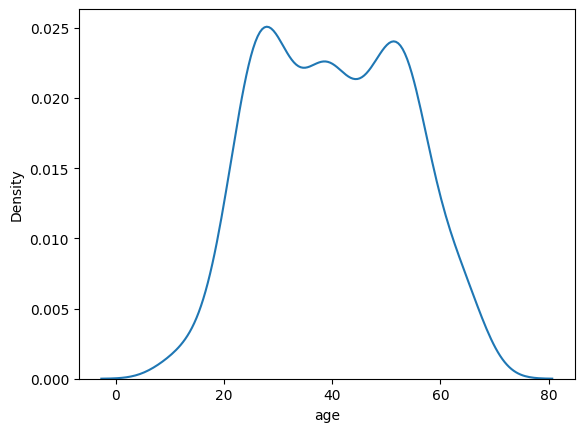

In [88]:
sb.kdeplot(dataset['age'])
plt.show()

age Correlation: 0.09835669021700891
sleep_duration Correlation: -0.027466558164158505


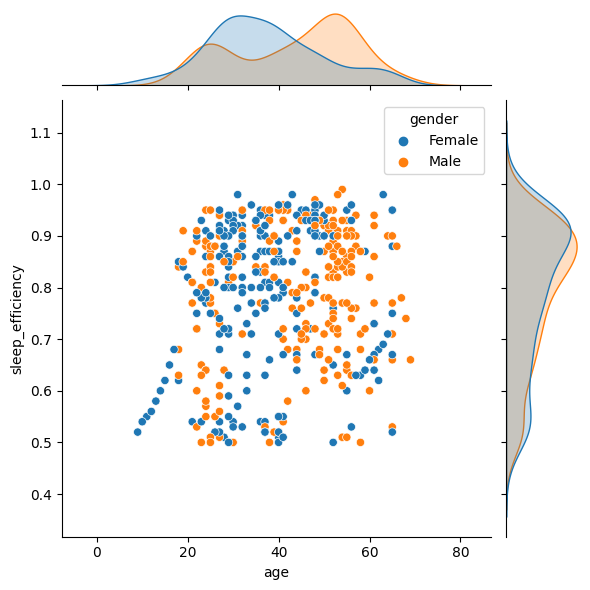

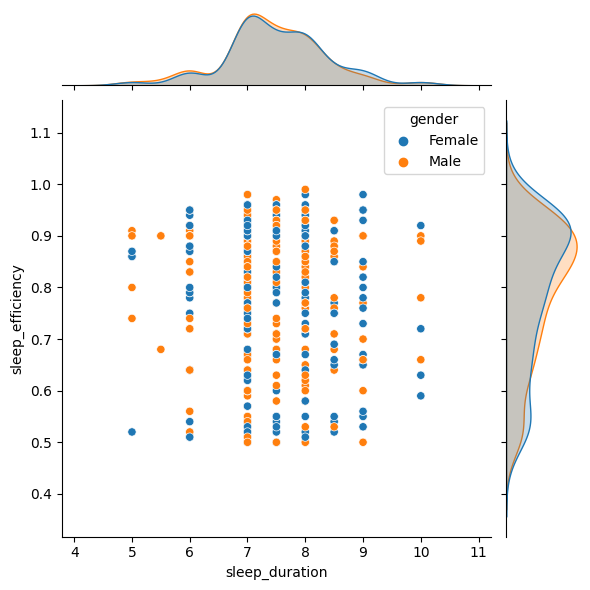

In [89]:
numerical_data = dataset.filter(['sleep_efficiency','age','sleep_duration','gender'])
for var in numerical_data:
        if var!= 'sleep_efficiency' and var!='gender':
            sb.jointplot(data = numerical_data, x = var, y='sleep_efficiency', hue='gender')
            print(var + " Correlation: " + str(numerical_data[var].corr(numerical_data['sleep_efficiency'])))

## Light Sleep vs Deep Sleep vs REM Sleep
According to sleepfoundation.org, one sleep cycle occurs in 4 stages, 2 stages of light sleep followed by 1 stage of deep sleep and 1 stage of REM Sleep.

#### Light Sleep
Stage 1 (Light Sleep): As your brain slows down, low-amplitude mixed-frequency (LAMF) activity replaces the alpha brain waves that took over as you became drowsy. Your body has some muscle tone, and your breathing is regular.
Stage 2 (Light Sleep): Your heart rate and body temperature both decrease. Sleep spindles and K-complexes, specific brain wave patterns, begin occurring as you continue transitioning toward deep sleep.

#### Deep Sleep
Deep sleep, also called slow-wave sleep, occurs in the third stage of non-rapid eye movement (NREM) sleep. Typically, you descend into deep sleep within an hour of falling asleep, and experience progressively shorter periods of deep sleep as the night wears on. During deep sleep, body functions like breathing and heart rate are also very slow and your muscles are relaxed. It can be difficult for someone to wake you up, and waking up out of deep sleep may make you feel mentally foggy for up to an hour. It is the most sleep stage out of the 4.

#### REM Sleep
Rapid eye movement (REM) sleep is a stage of sleep associated with dreaming and memory consolidation. You experience your first cycle of REM sleep about 60 to 90 minutes after falling asleep. As part of a full night’s sleep, you cycle through four stages of sleep multiple times: three stages of non-REM sleep, followed by one stage of REM sleep. Each cycle through all the sleep stages takes 90 to 120 minutes to complete. With each new cycle, you spend increasing amounts of time in REM sleep, with most of your REM sleep taking place in the second half of the night.

## Relationship between Sleep duration and Sleep Percentages

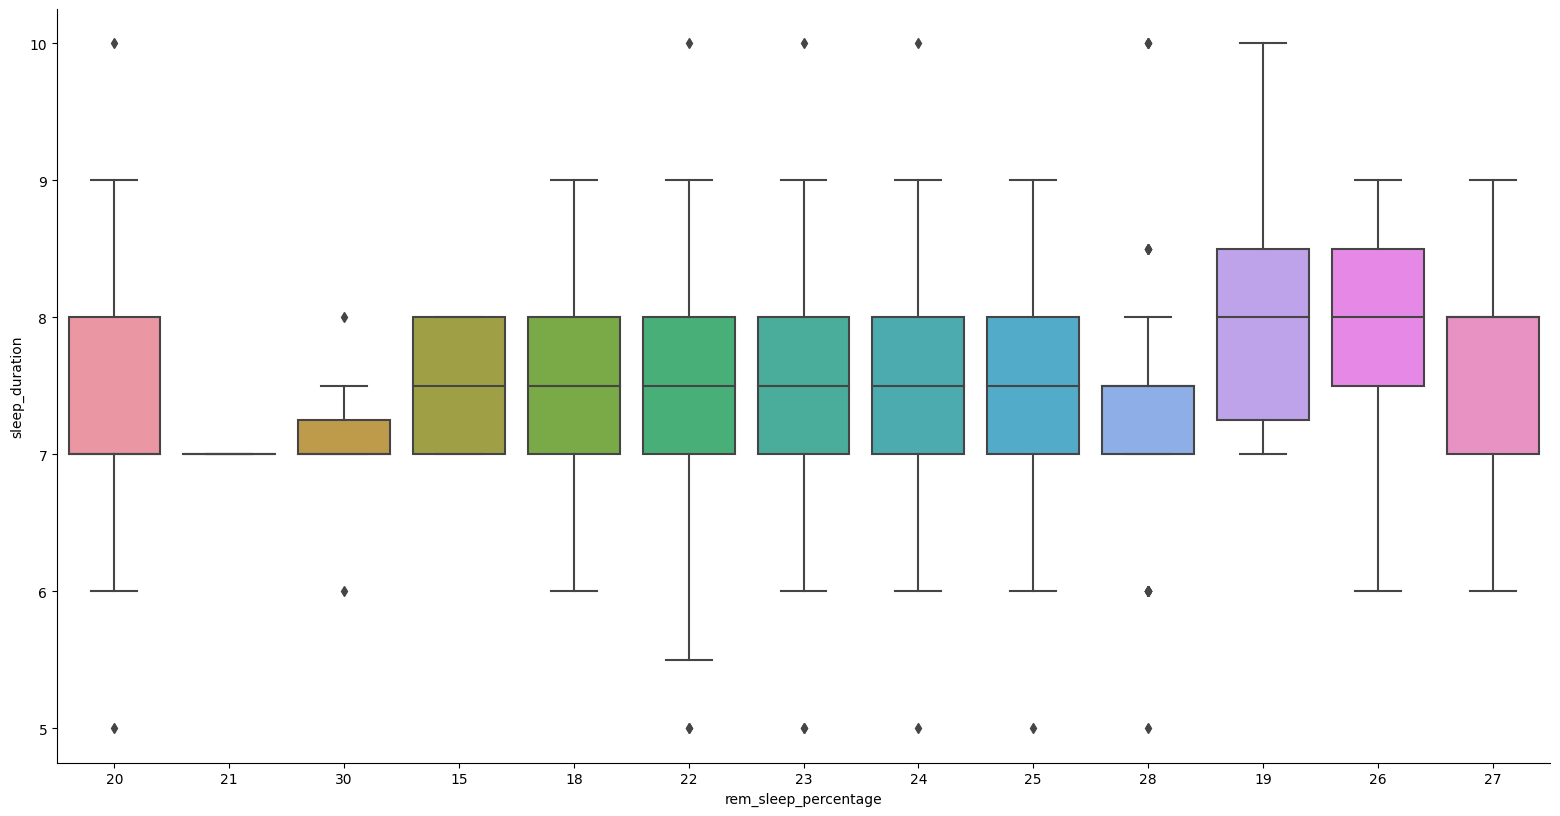

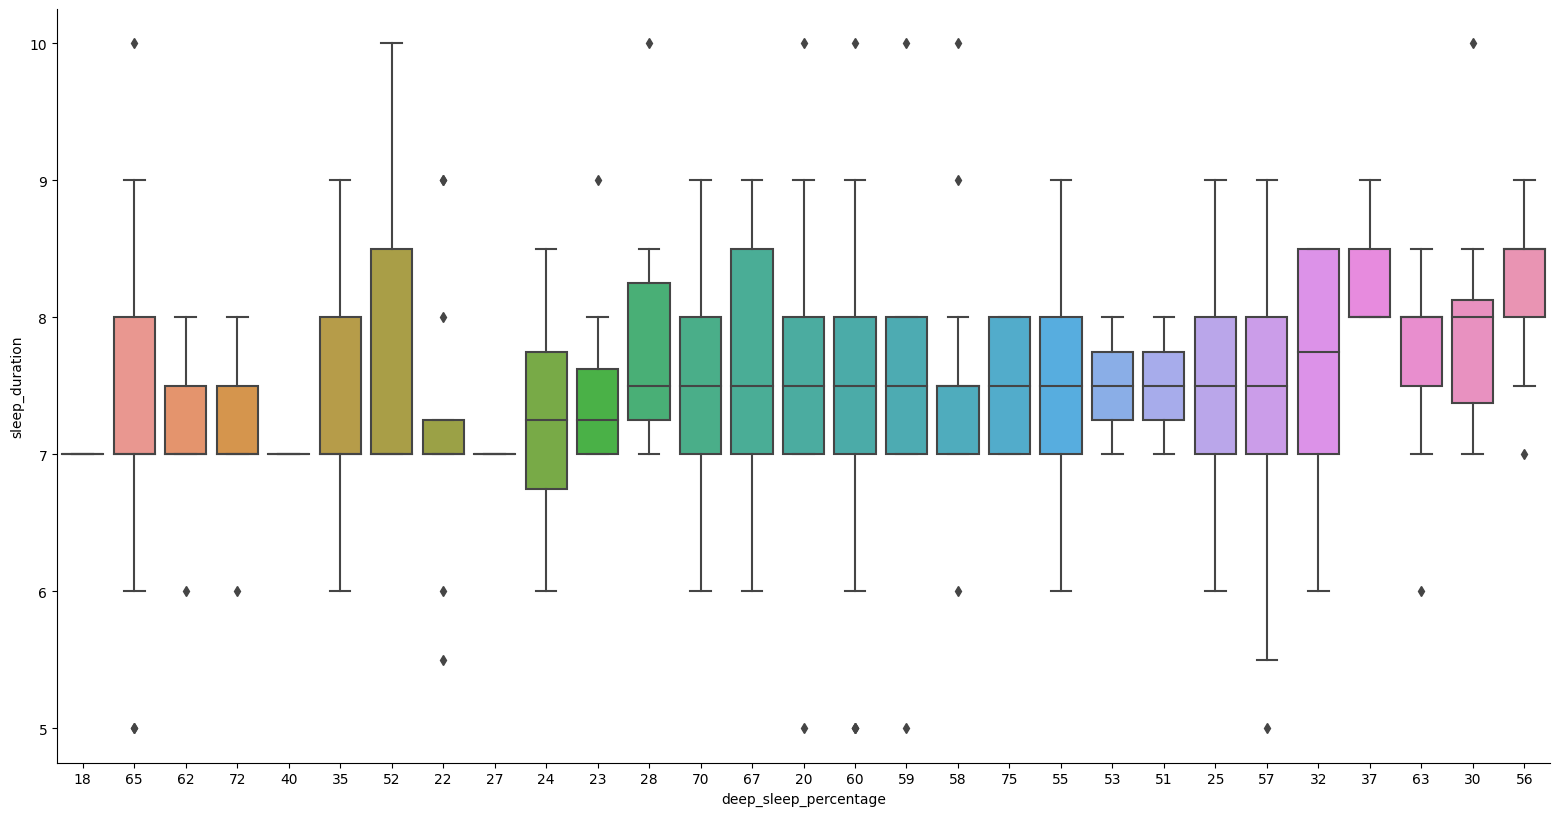

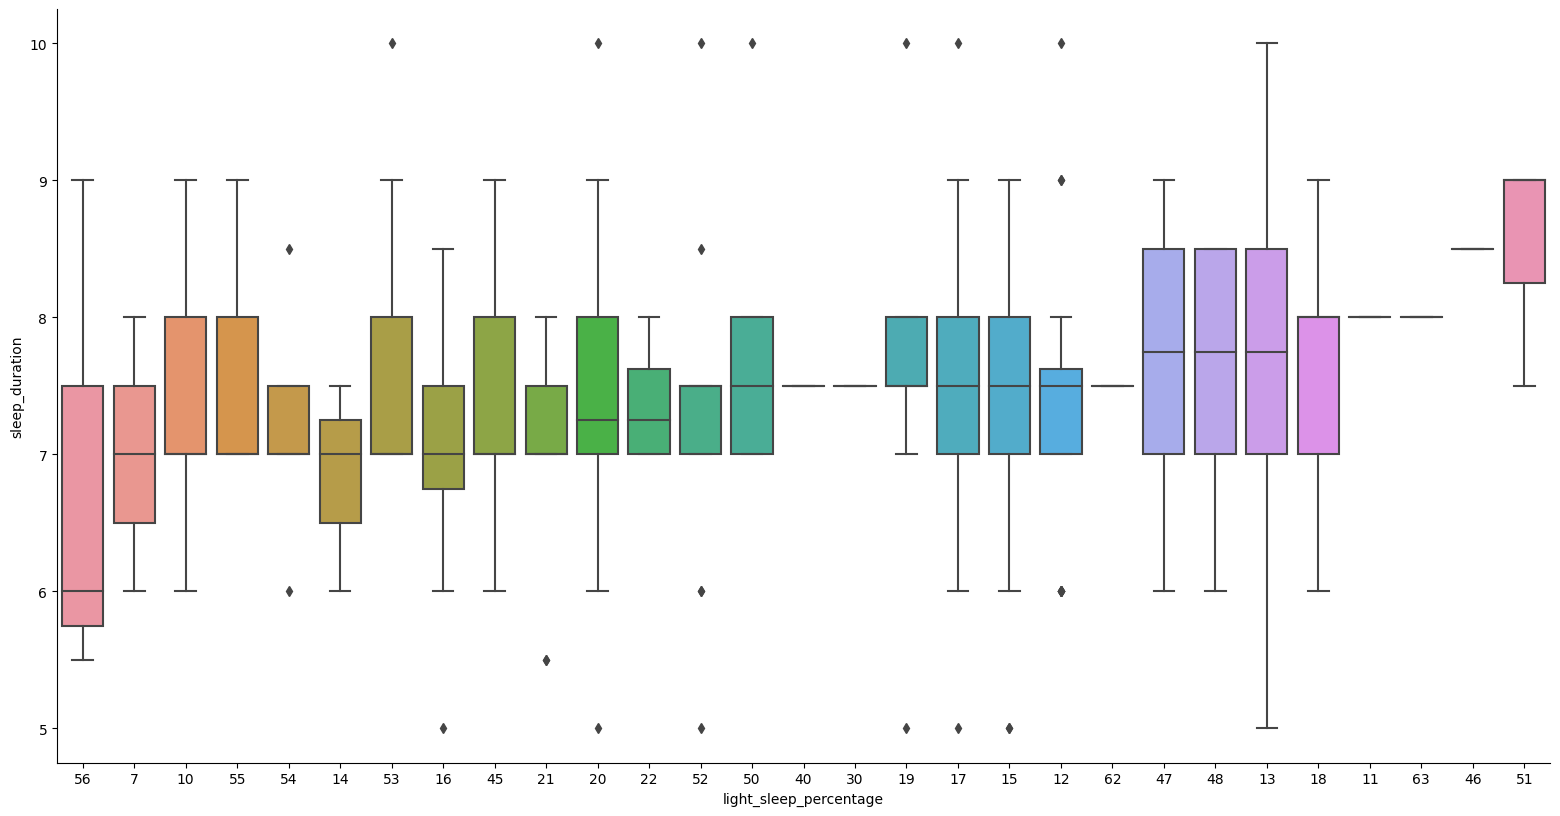

In [90]:
sleep_duration = dataset.filter(['sleep_duration', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage'])

for var in sleep_duration:
    if var != 'sleep_duration':
        tmp=sleep_duration.filter(['sleep_duration',var])
        sb.catplot(data=tmp, x=var, y='sleep_duration', kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby(var)['sleep_duration'].median().sort_values().index)

Results are inconclusive

*consider to remove this portion

## Relationship between Sleep Efficiency and Sleep Percentages

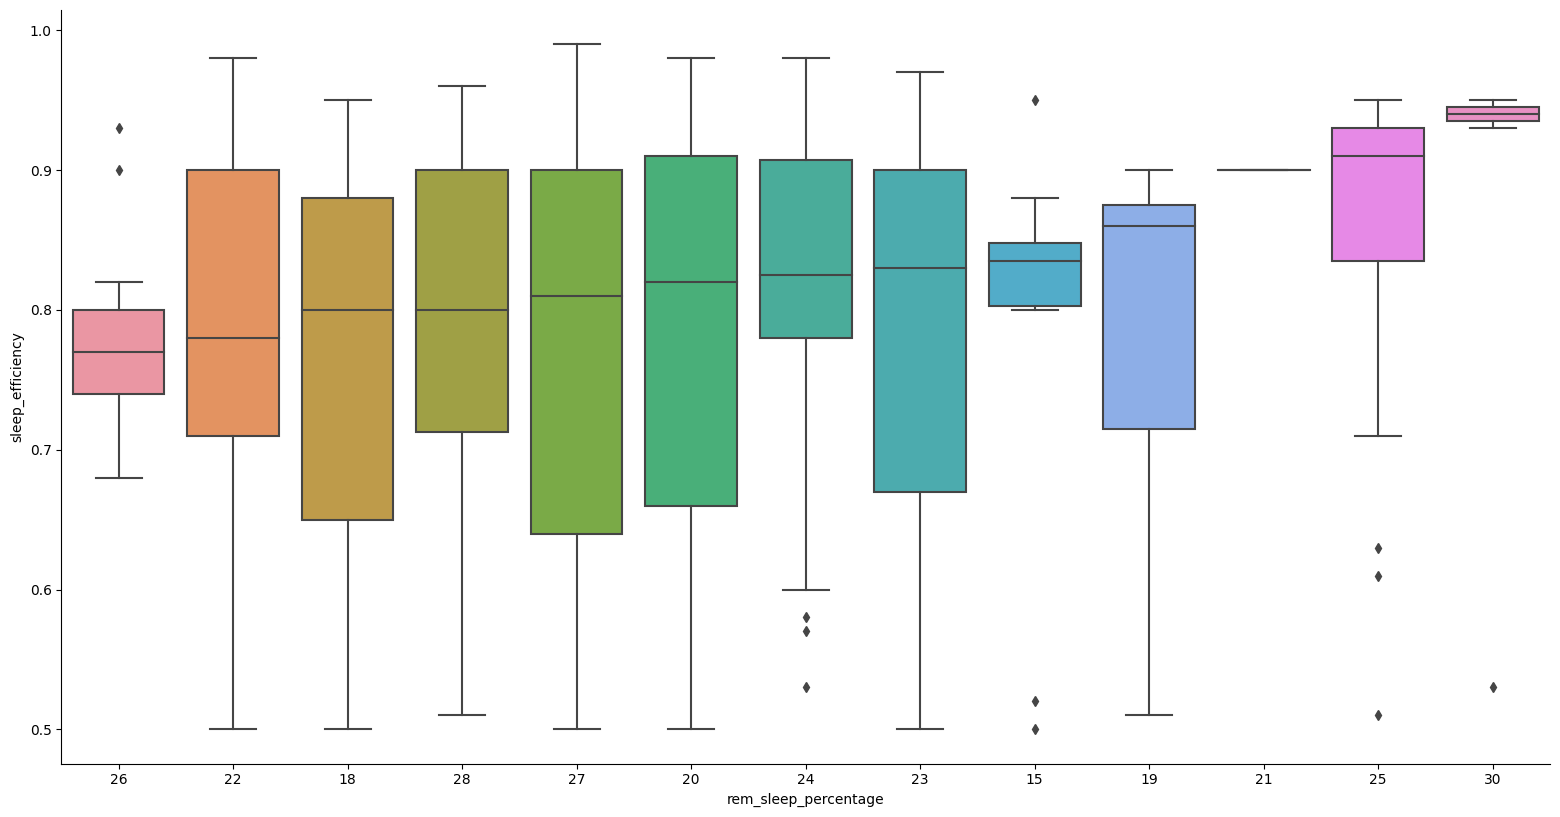

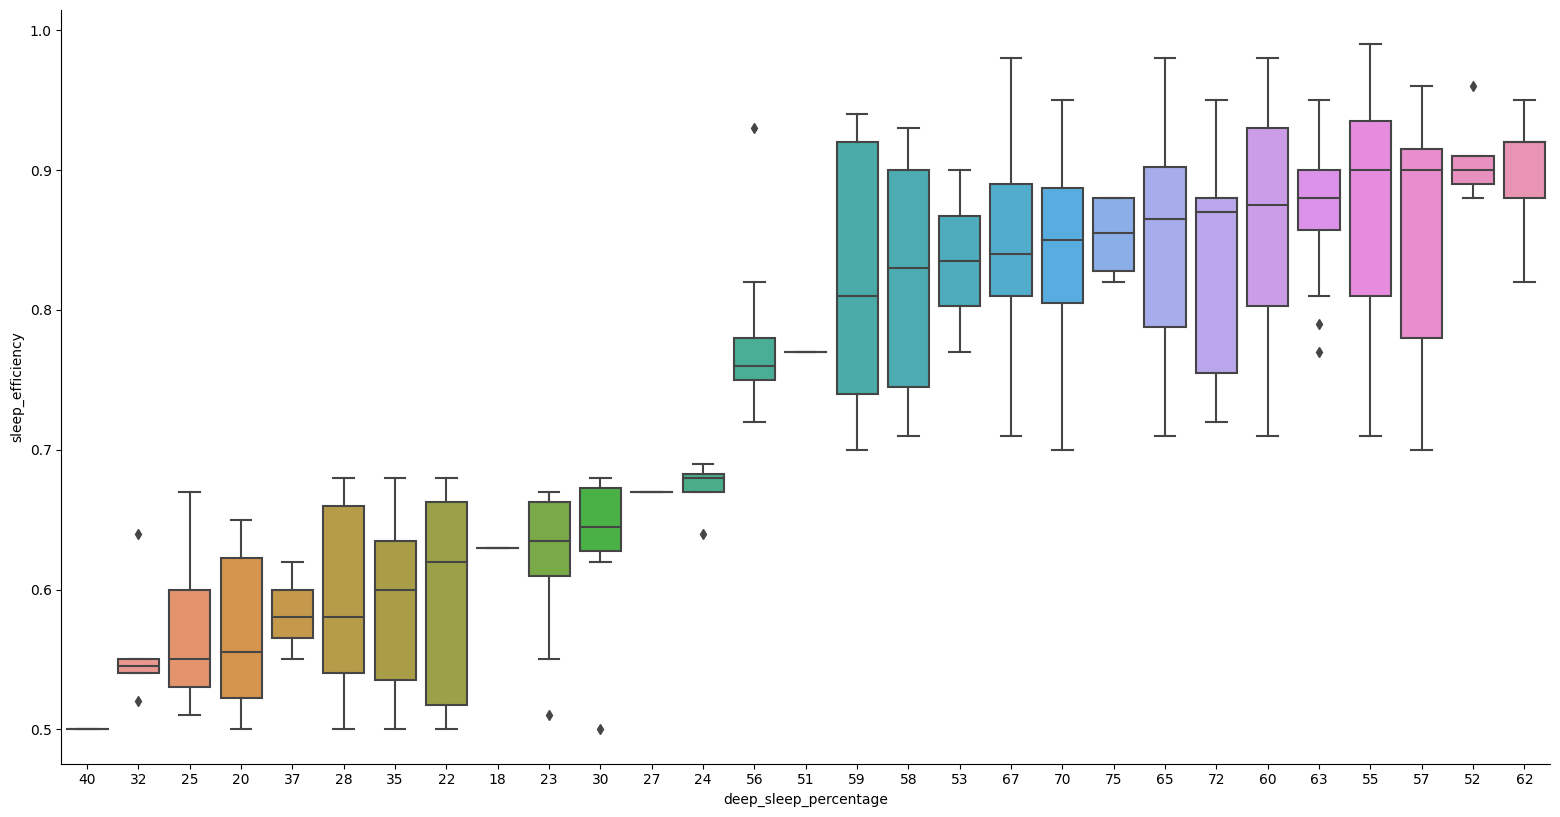

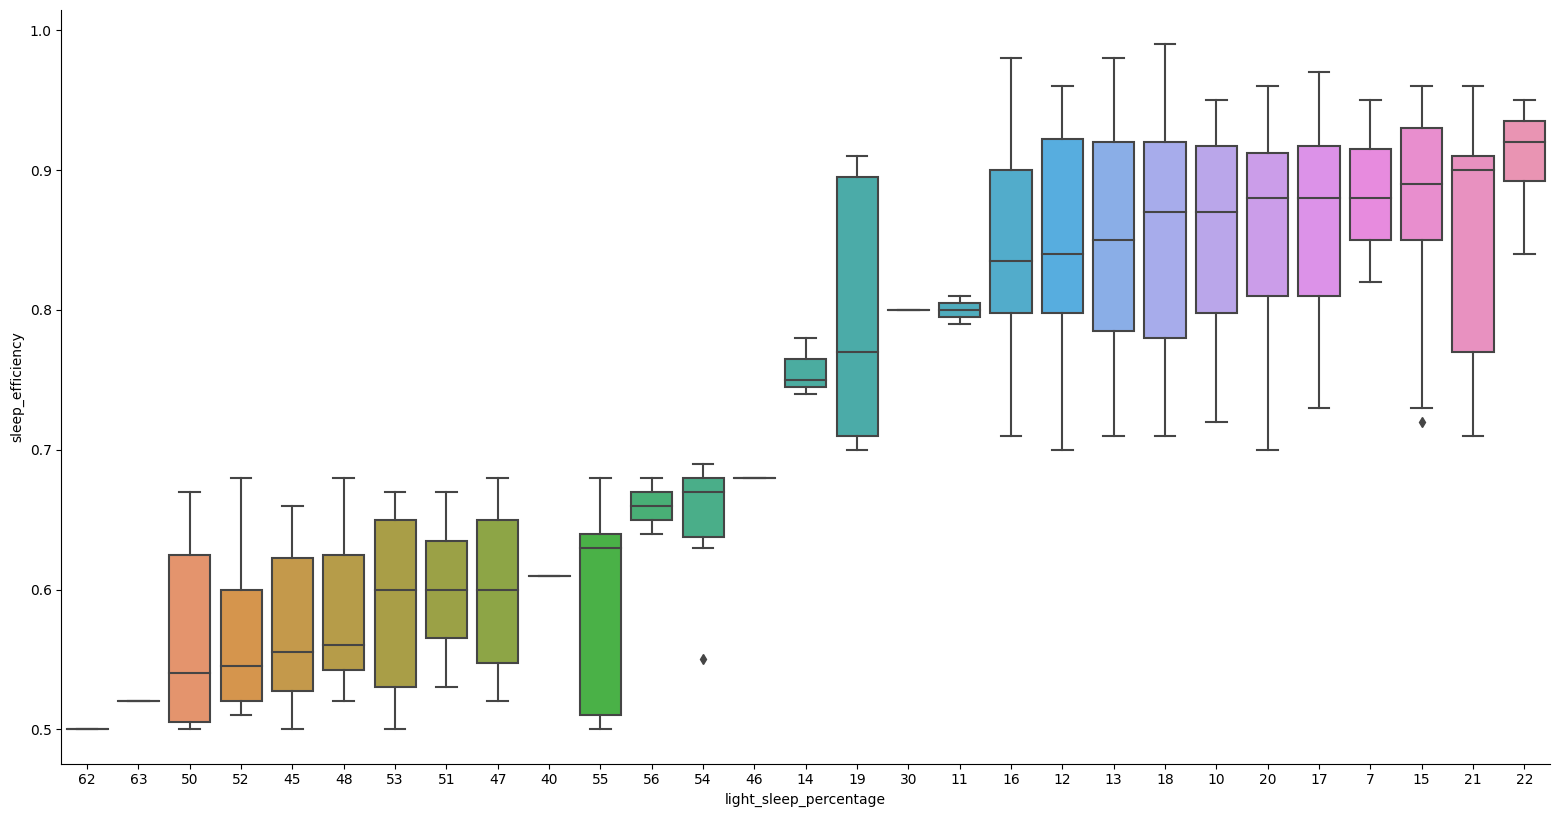

In [91]:
sleep_percentages = dataset.filter(['sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage'])

for var in sleep_percentages:
    if var != 'sleep_efficiency':
        tmp=sleep_percentages.filter(['sleep_efficiency',var])
        sb.catplot(data=tmp, x=var, y='sleep_efficiency', kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby(var)['sleep_efficiency'].median().sort_values().index)

From the boxplots, we can deduce the following:

1. There is no strong relation between sleep efficiency and REM sleep percentage.

2. Deep sleep percentage generally increases with sleep efficiency.

3. Light sleep percentage generally decreases with sleep efficiency.

## Defining Sleep Quality

#### 1. Sleep Efficiency
People who spend less than 85% of their time in bed not sleeping have poor sleep efficiency.
#### 2. Deep Sleep Percentage
Apparently second stage is the most important as it is the stage where the most recovery occurs
#### 3. Number of Awakenings


to further elaborate the reasons

https://www.sleepfoundation.org/sleep-hygiene/how-is-sleep-quality-calculated

## Does Sleep Duration affect Sleep Quality?

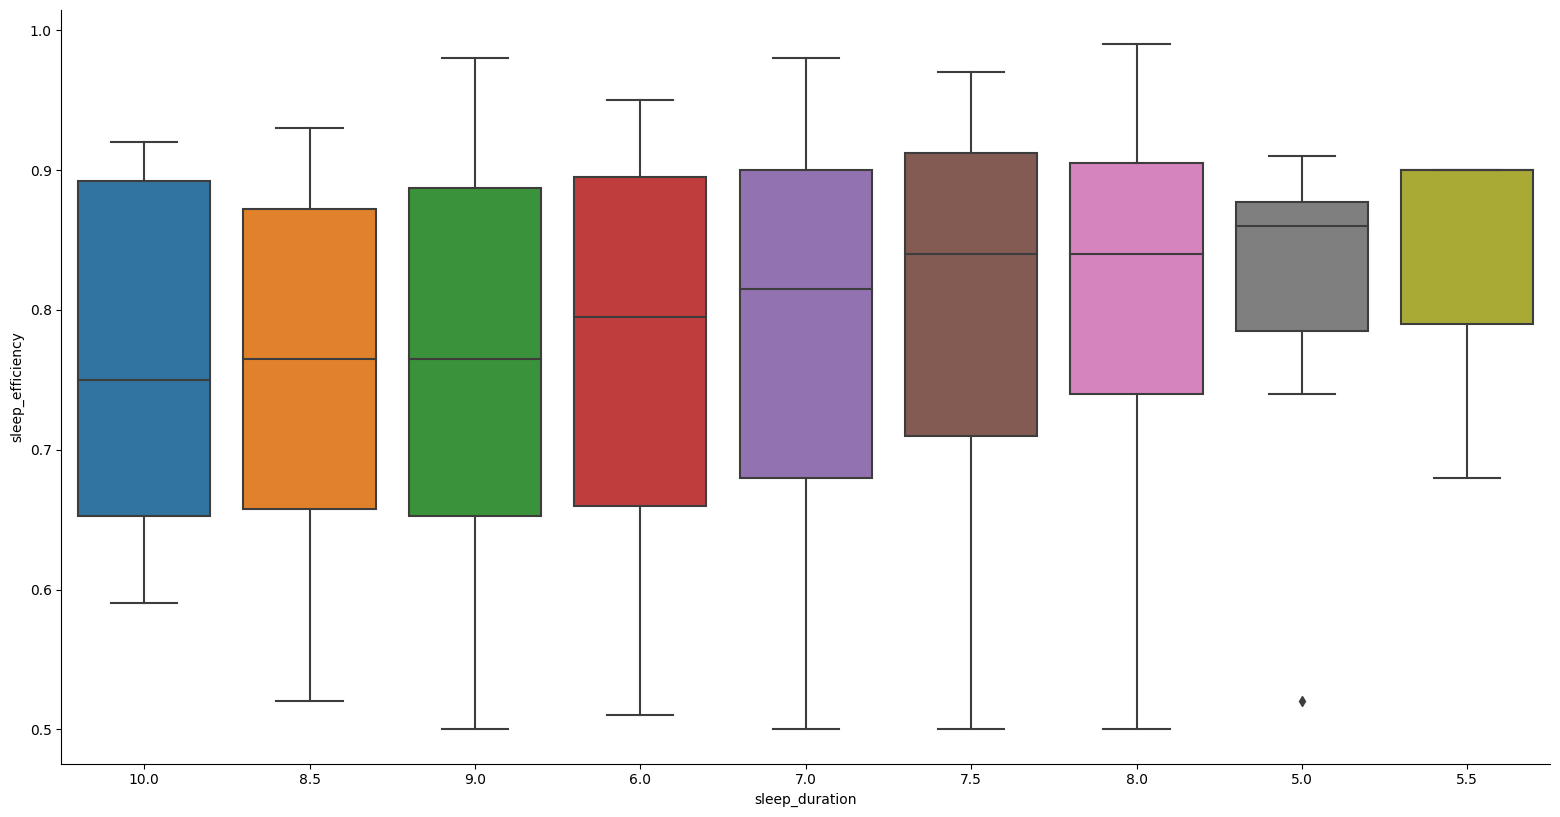

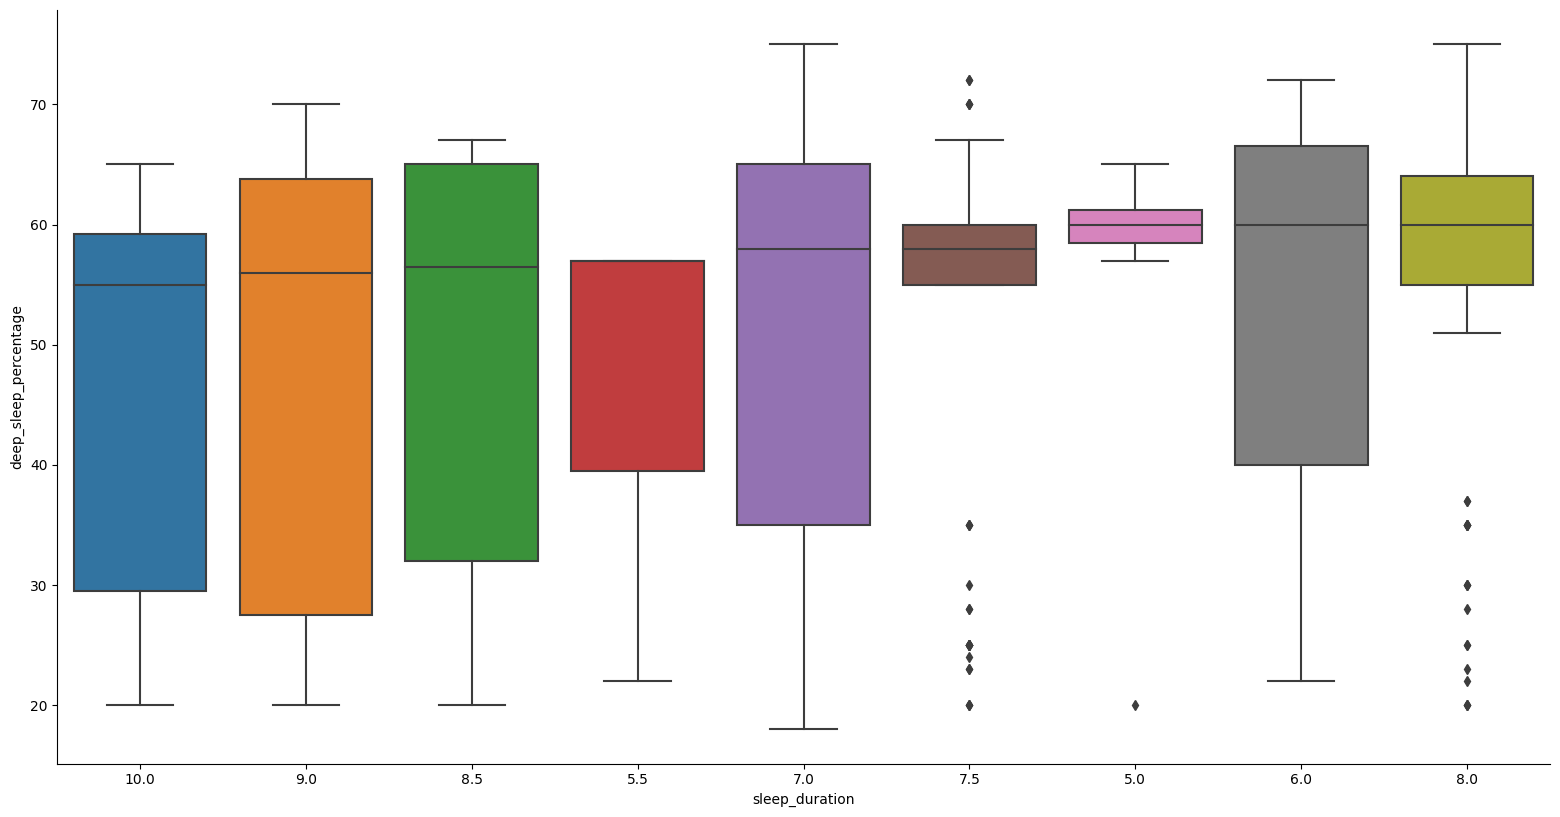

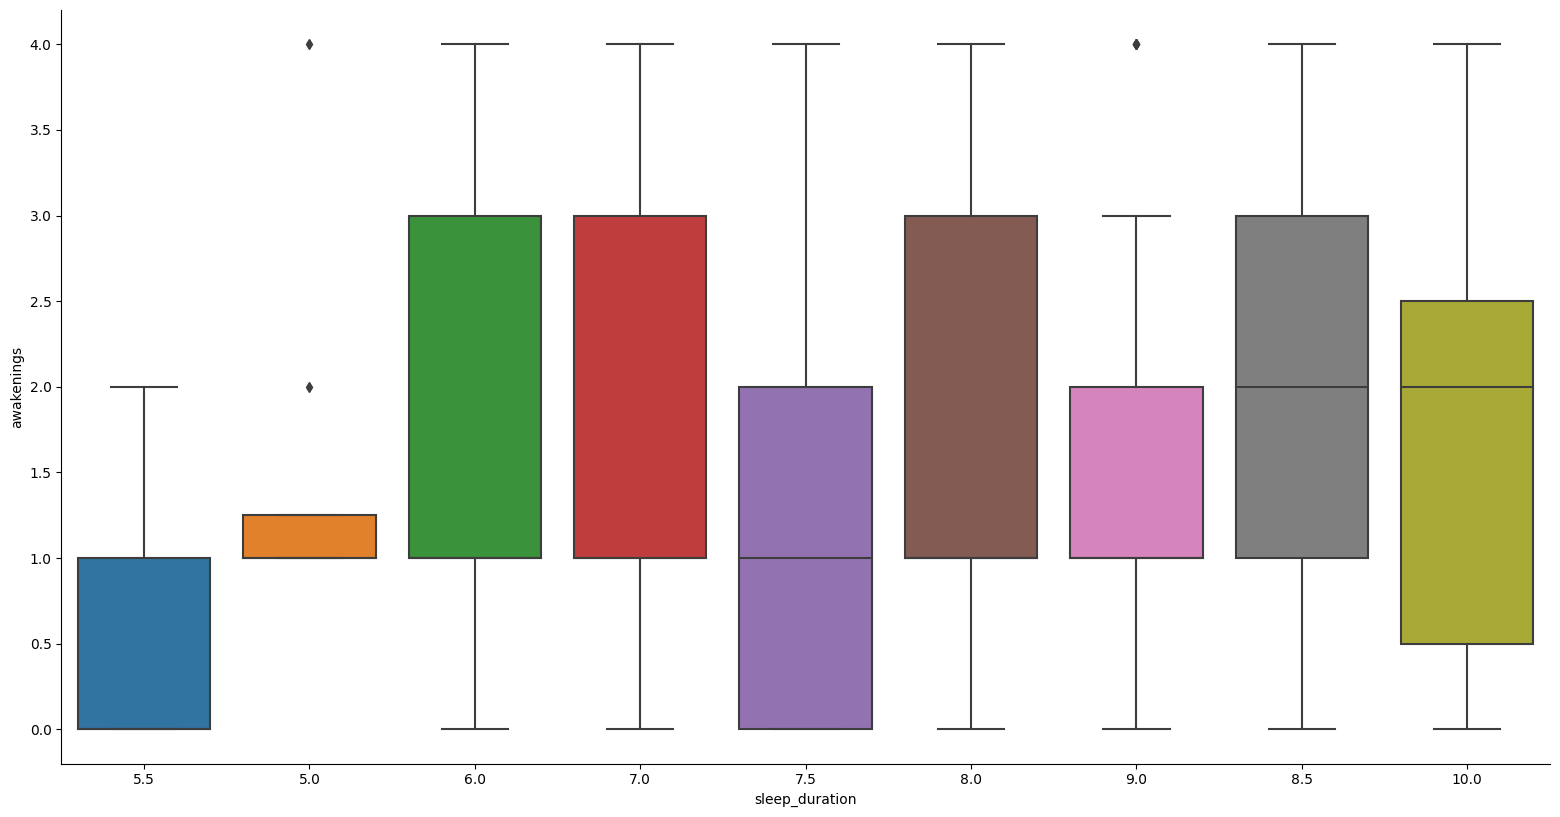

In [92]:
sleep_duration = dataset.filter(['sleep_duration', 'sleep_efficiency', 'deep_sleep_percentage', 'awakenings'])

for var in sleep_duration:
    if var != 'sleep_duration':
        tmp=sleep_duration.filter(['sleep_duration',var])
        sb.catplot(data=tmp, x='sleep_duration', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('sleep_duration')[var].median().sort_values().index)

## Does Smoking affect Sleep Quality?

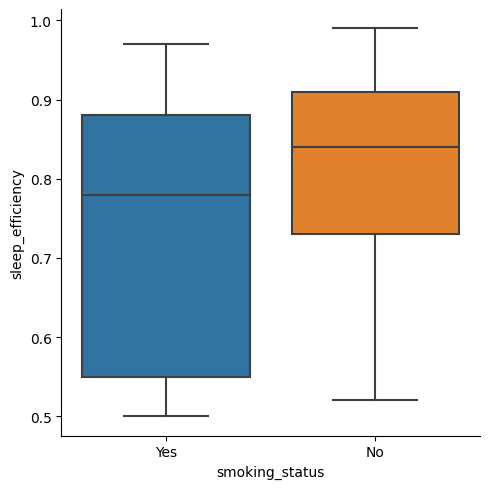

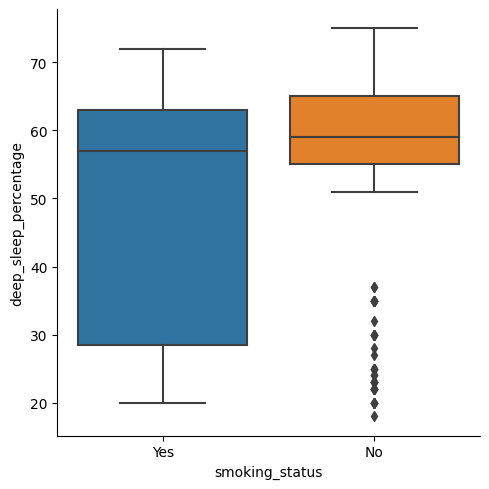

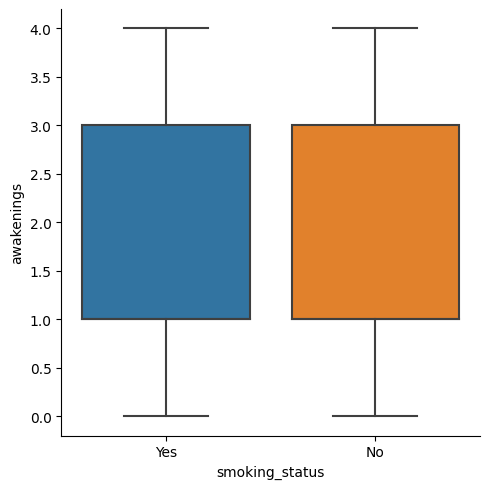

In [93]:
smoking = dataset.filter(['smoking_status', 'sleep_efficiency', 'deep_sleep_percentage', 'awakenings'])

for var in smoking:
    if var != 'smoking_status':
        tmp=smoking.filter(['smoking_status',var])
        sb.catplot(data=tmp, x='smoking_status', y=var, kind='box')

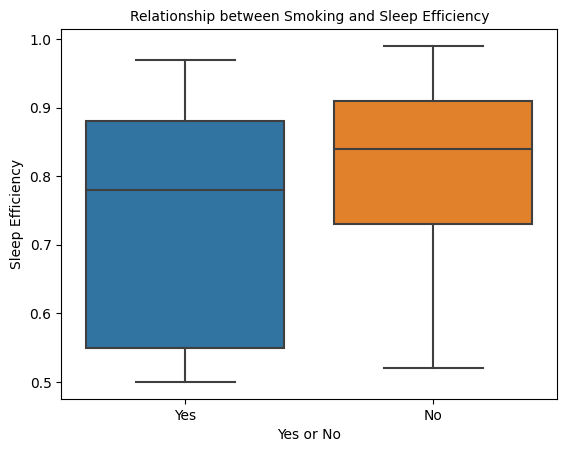

In [94]:
sb.boxplot(data=dataset,x="smoking_status",y="sleep_efficiency")
plt.xlabel("Yes or No",fontsize=10)
plt.ylabel("Sleep Efficiency",fontsize=10)
plt.title("Relationship between Smoking and Sleep Efficiency",fontsize=10)
plt.show()

From the box plot we can tell that non-smokers have higher sleep efficiency than non-smokers

## Does Exercise Frequency affect Sleep Quality?

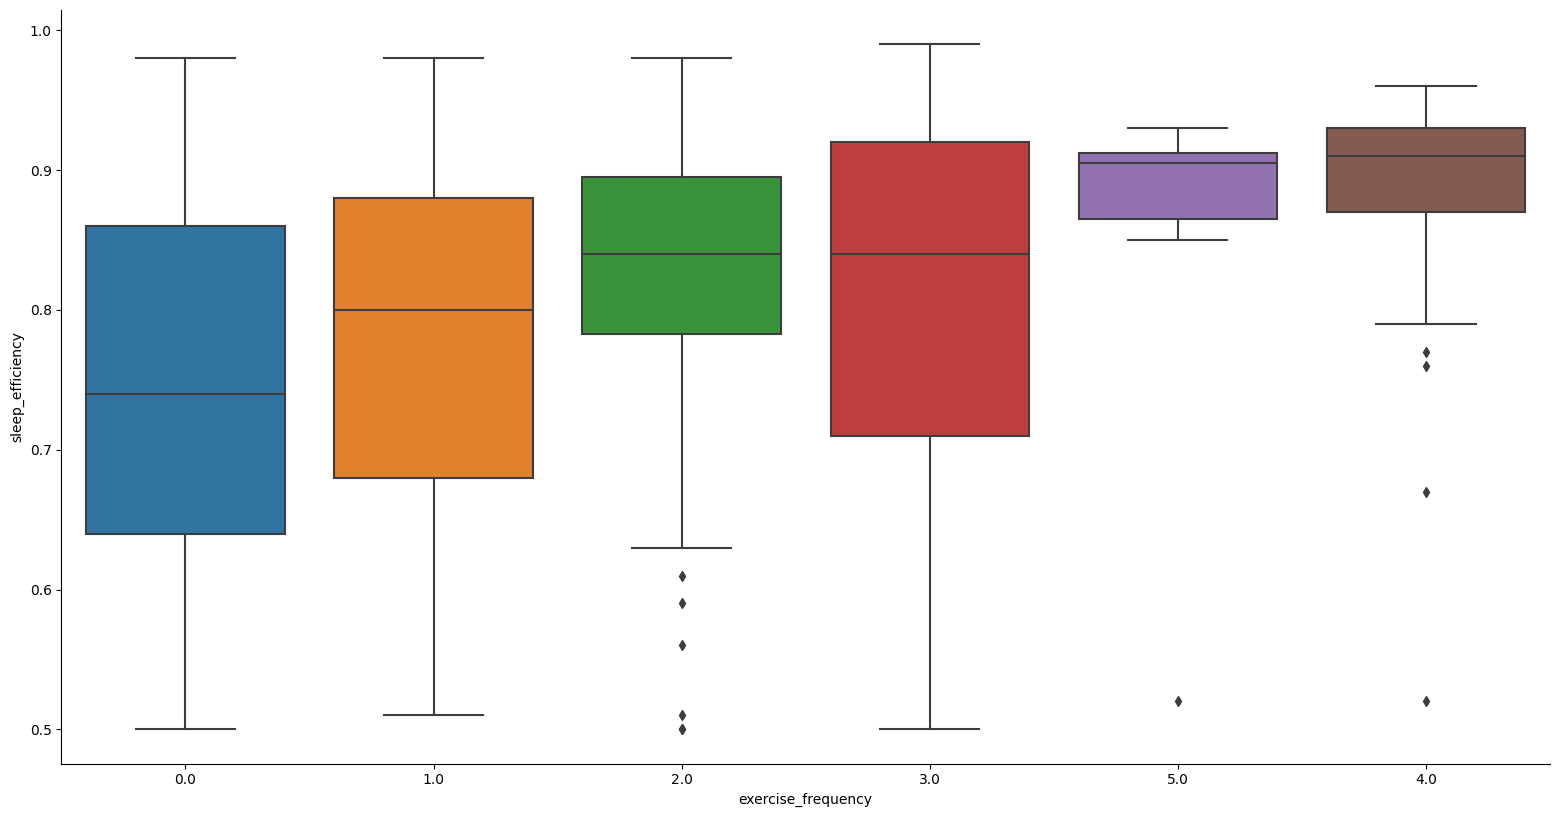

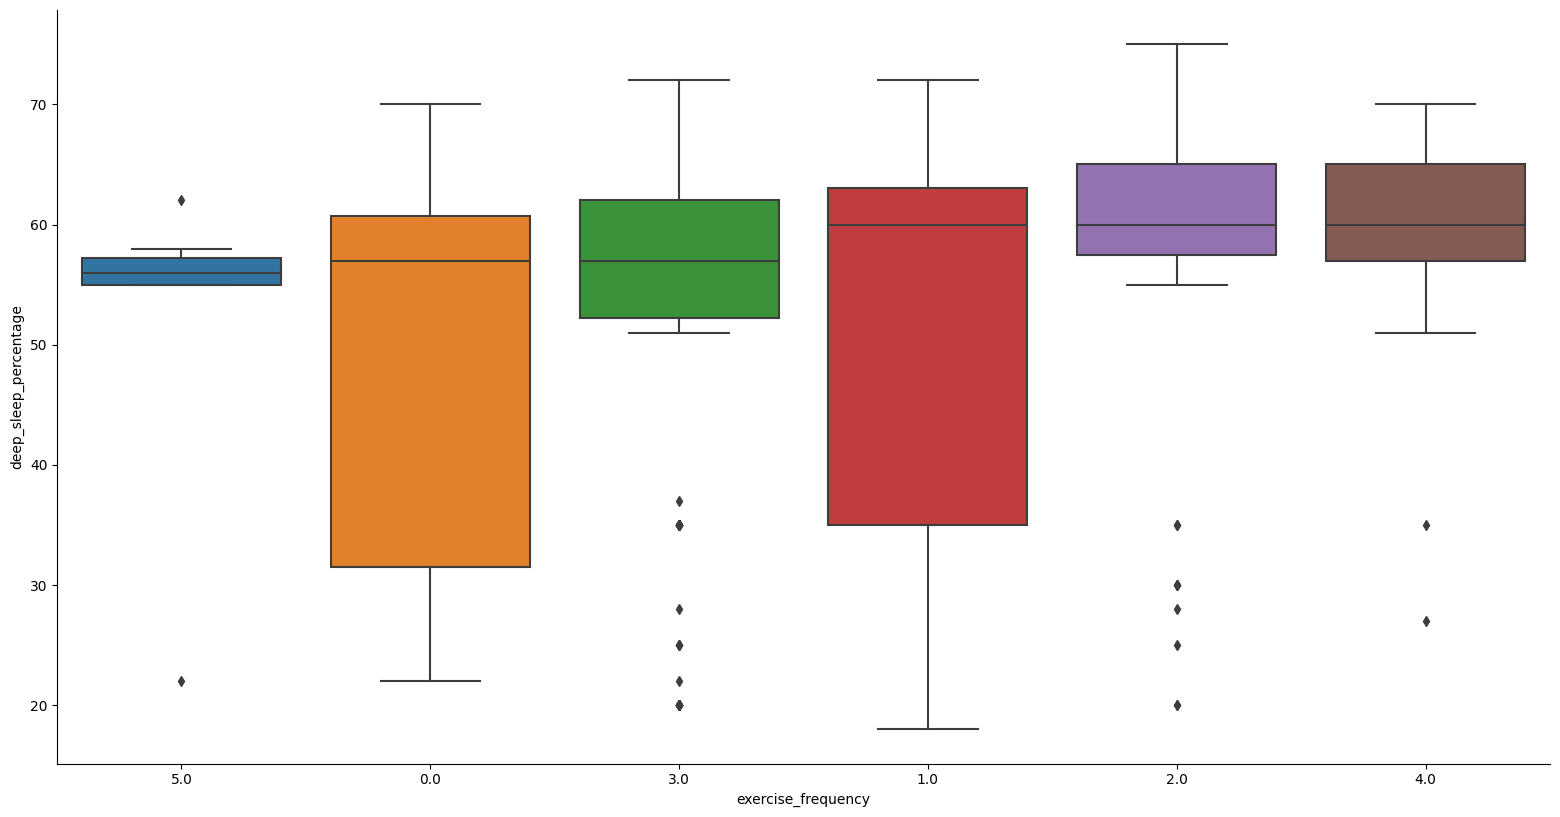

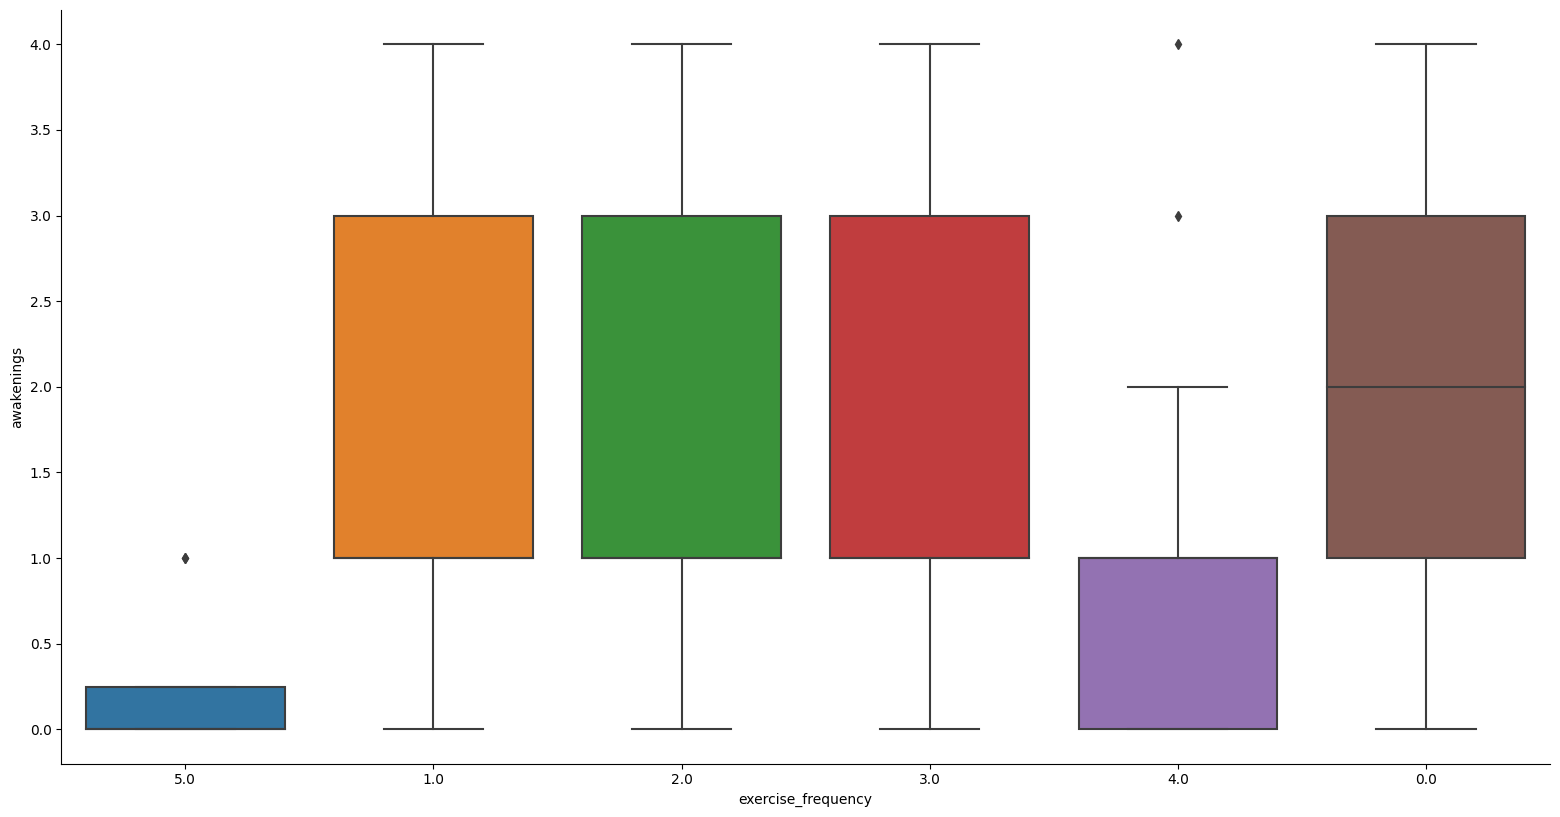

In [95]:
exercise = dataset.filter(['exercise_frequency', 'sleep_efficiency', 'deep_sleep_percentage', 'awakenings'])

for var in exercise:
    if var != 'exercise_frequency':
        tmp=exercise.filter(['exercise_frequency',var])
        sb.catplot(data=tmp, x='exercise_frequency', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('exercise_frequency')[var].median().sort_values().index)

From the data set, we can infer that sleep efficiency increases with exercise frequency

## Does Alcohol Consumption affect Sleep Quality?

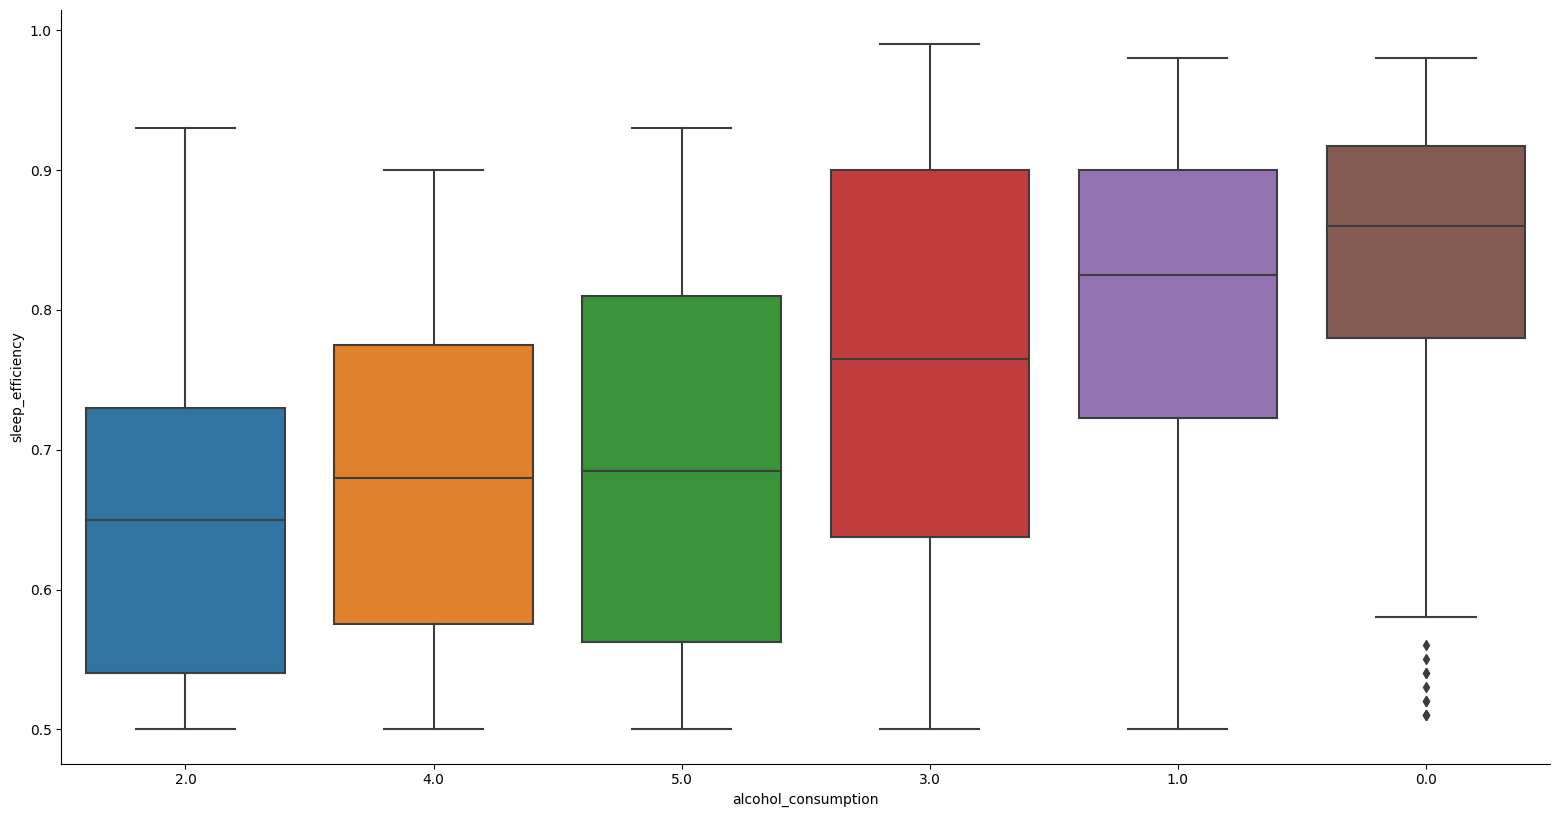

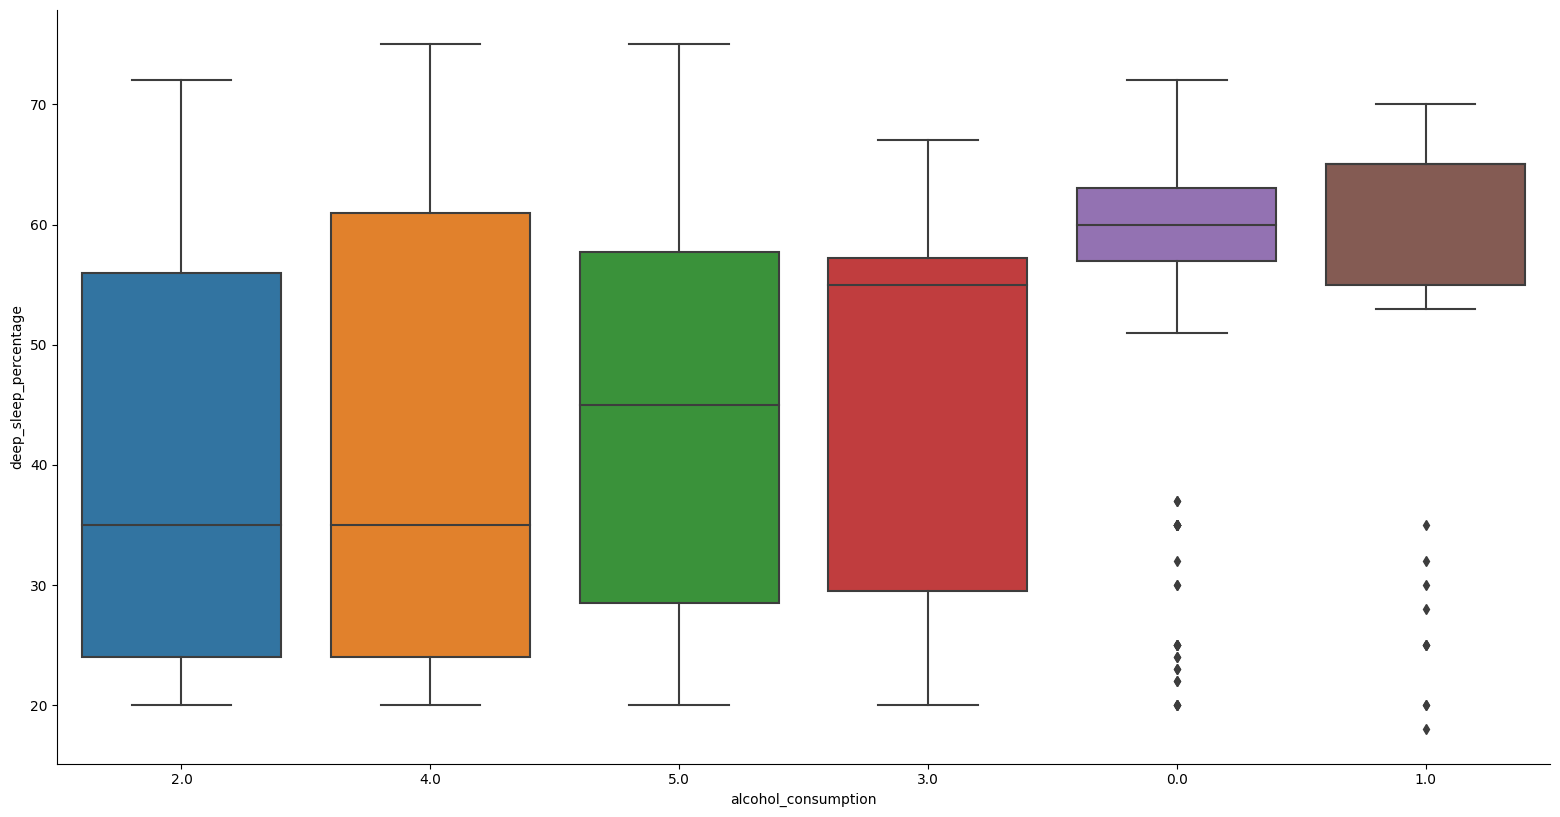

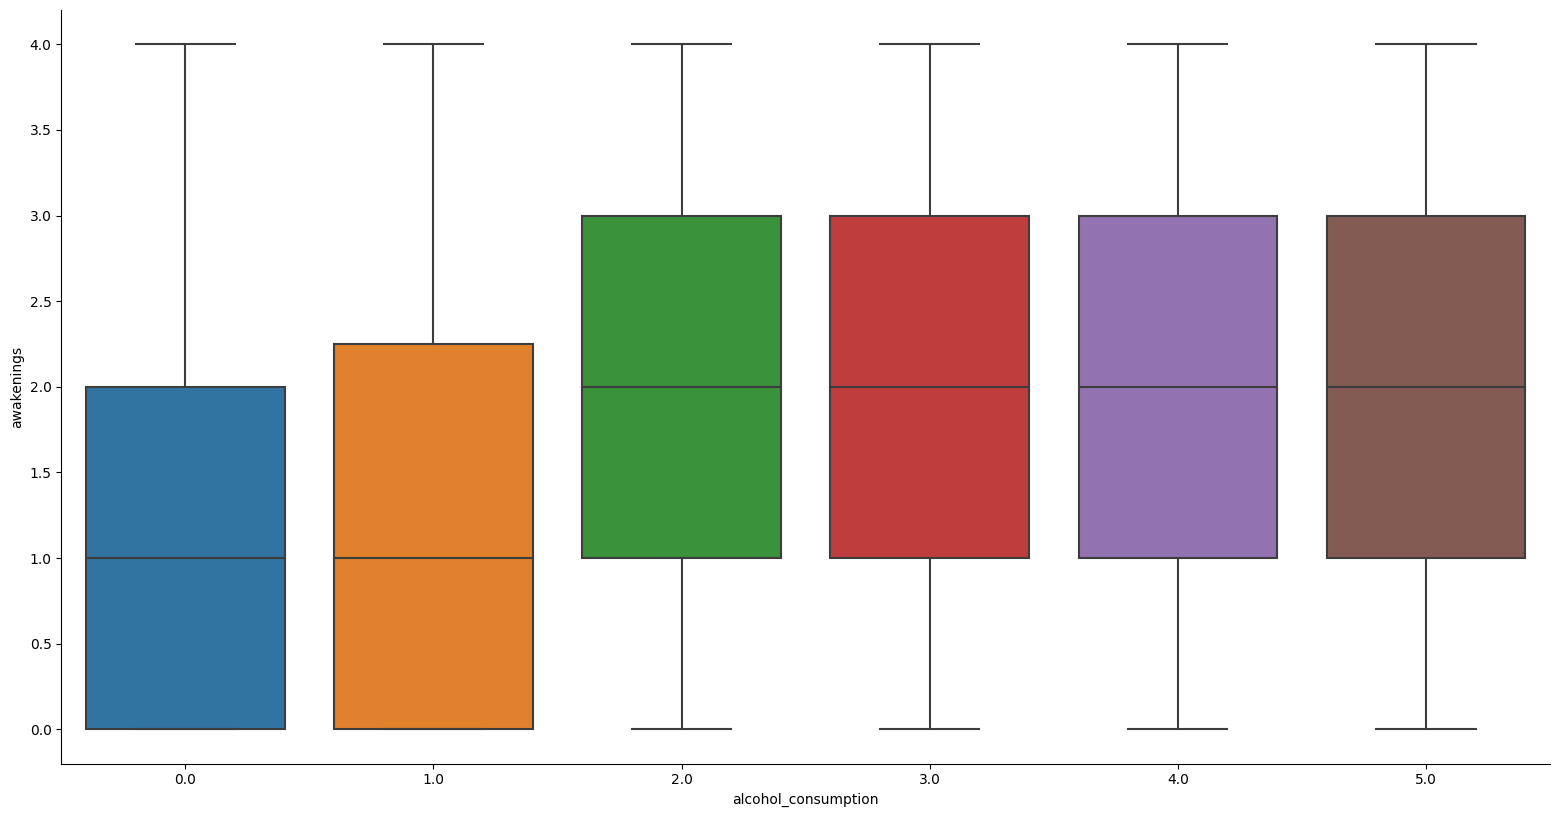

In [96]:
alcohol = dataset.filter(['alcohol_consumption', 'sleep_efficiency', 'deep_sleep_percentage', 'awakenings'])

for var in alcohol:
    if var != 'alcohol_consumption':
        tmp=alcohol.filter(['alcohol_consumption',var])
        sb.catplot(data=tmp, x='alcohol_consumption', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('alcohol_consumption')[var].median().sort_values().index)

## Does Bed Time affect Sleep Quality? (Consider appropriate diagram)

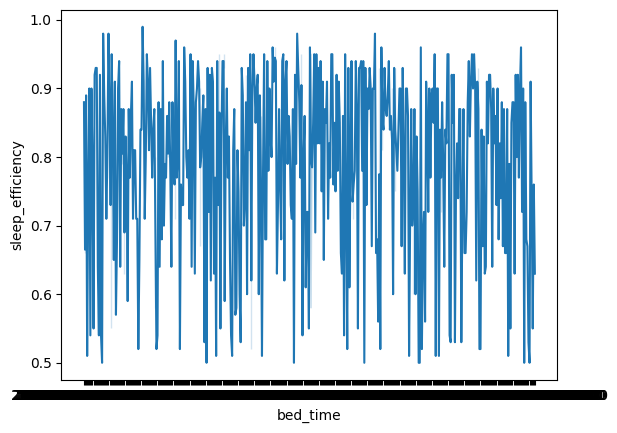

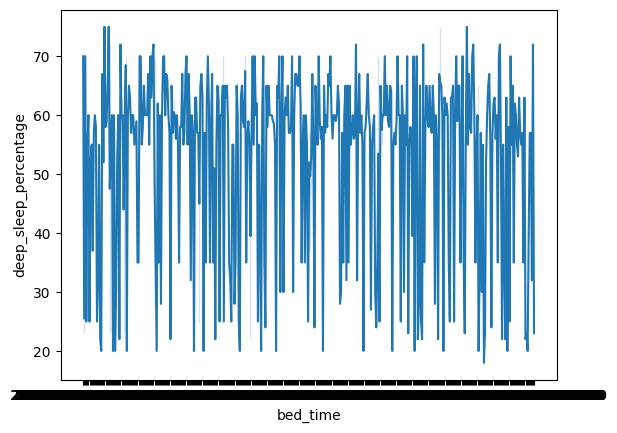

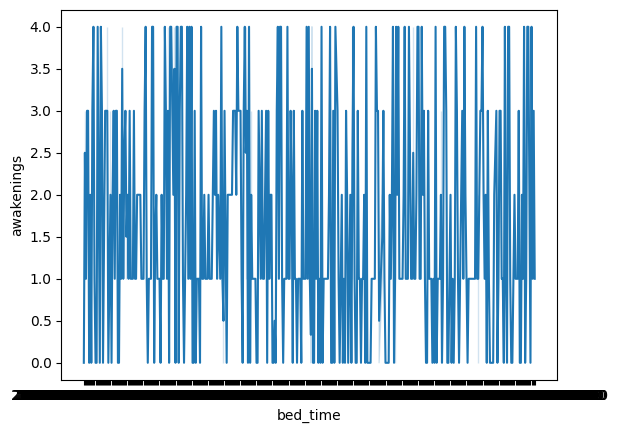

In [114]:
bedtime = dataset.filter(['bed_time', 'sleep_efficiency', 'deep_sleep_percentage', 'awakenings'])

for var in bedtime:
    if var != 'bed_time':
        tmp=bedtime.filter(['bed_time',var])
        sb.lineplot(data=tmp, x='bed_time', y=var)
        plt.show()
                  

## Checkpoint 3. Methodology
Explain the reason for choosing your machine learning model.
Detailed & formal introduction to your model. You must provide the formulation or diagram of the model you use thoroughly. 
Clarify how you train and inference based on the model you choose.
Clarify the choice of hyperparameters of your model.


## Multivariate Linear Regression

In [98]:
# Function for regression plotting
def regression_plot(predictor, response):
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.20)

    # Linear Regression using Train Data
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict response values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Plot the regression line
    f = plt.figure(figsize=(24, 12))
    plt.scatter(y_train, y_train_pred)
    plt.plot(y_train, y_train, 'r-', linewidth = 3)

Intercept of Regression 	: b =  [0.88276623]
Coefficients of Regression 	: a =  [[-0.01268386]]



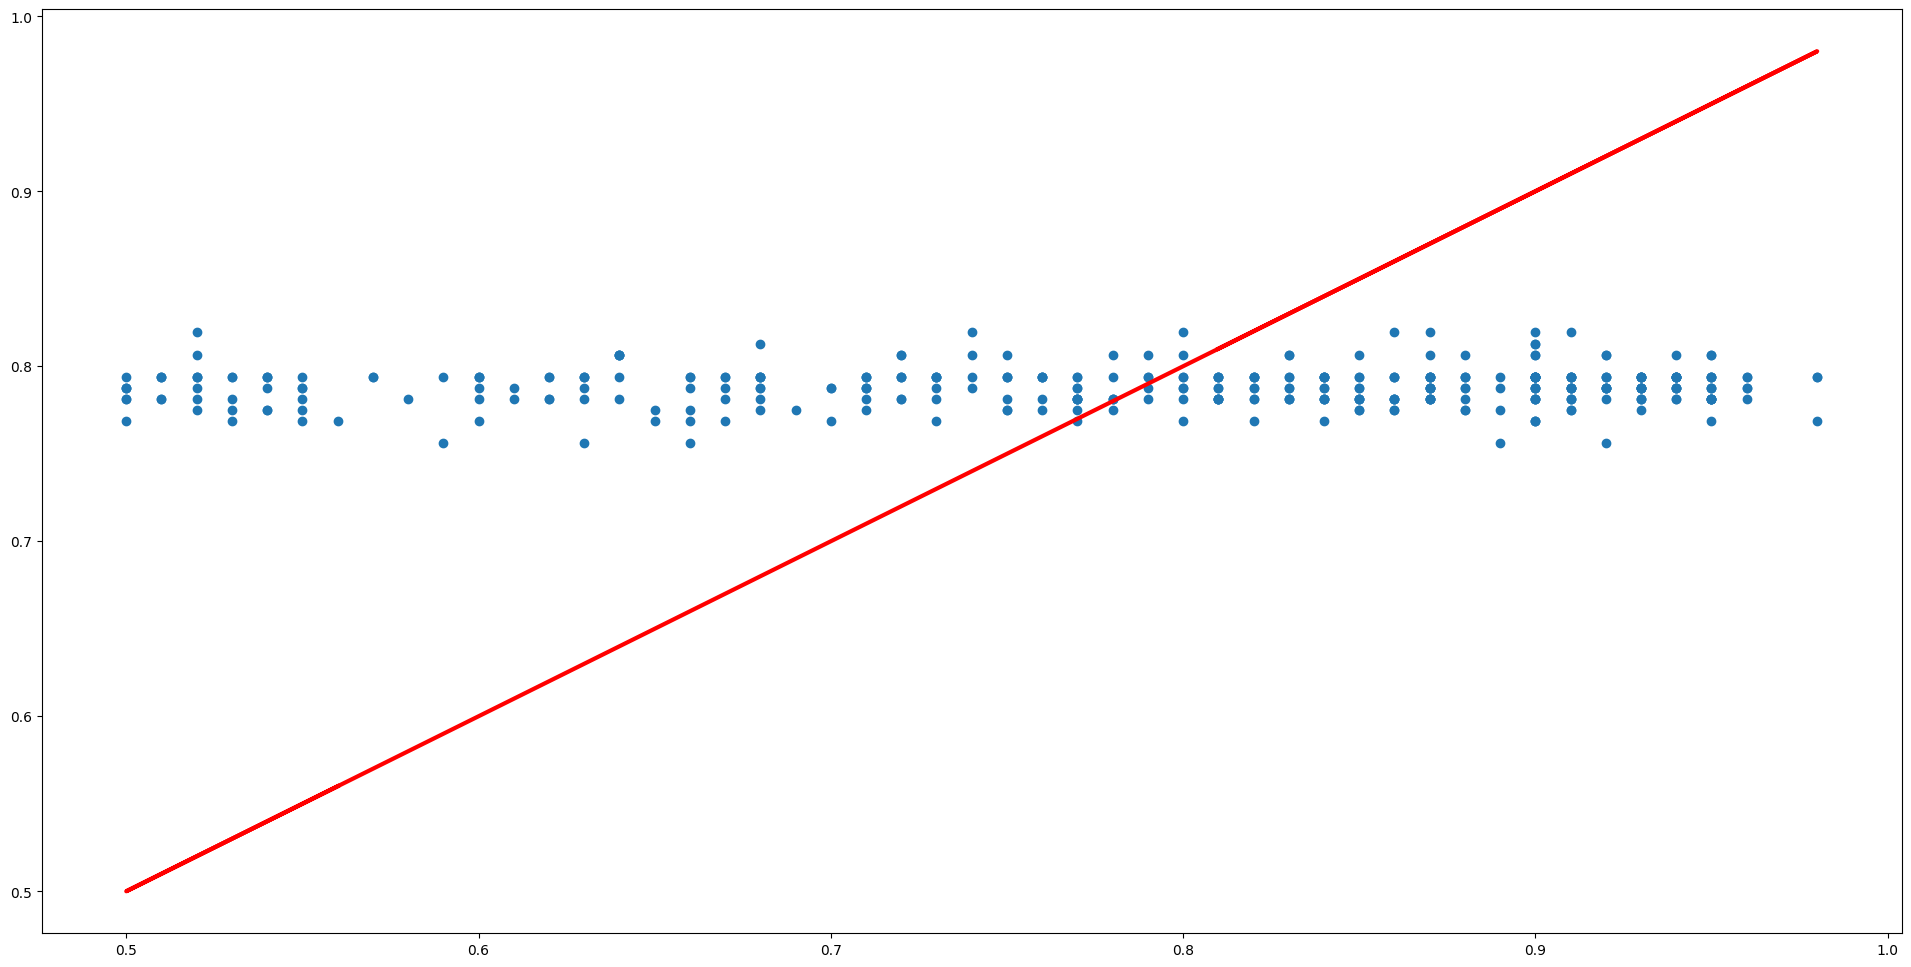

In [99]:
#Sleep Duration
sleepEfficiency = pd.DataFrame(dataset['sleep_efficiency'])
sleepDuration = pd.DataFrame(dataset['sleep_duration']) 
regression_plot(sleepDuration, sleepEfficiency)

In [100]:
#Sleep Duration
sleepEfficiency = pd.DataFrame(dataset['sleep_efficiency'])
lightSleep = pd.DataFrame(dataset['Light sleep percentage']) 
regression_plot(lightSleep, sleepEfficiency)

KeyError: 'Light sleep percentage'

In [ ]:
# Goodness of Fit Function
def goodness_of_fit(predictor, response, explained_variance = False):
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.20,random_state=0)
    
    # Linear Regression using Train Data
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    # Predict response values corresponding to predictor
    y_test_pred = linreg.predict(X_test)
    
    # Print the predictor and response variables
    print(predictor.columns[0] + " vs " + response.columns[0])
    
    # Print explained variance 
    if explained_variance == True:
        print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    
    # Check the Goodness of Fit (on Test Data)
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print()

In [ ]:
goodness_of_fit(sleepDuration, sleepEfficiency, explained_variance = True)


sleep_duration vs sleep_efficiency
Explained Variance (R^2) 	: 0.002573721357351788
Mean Squared Error (MSE) 	: 0.017715819982636404
Root Mean Squared Error (RMSE) 	: 0.13310078881297588



Checkpoint 5. Conclusion
Briefly summarize your findings in Experiments.
The limitation of your current model. How you can improve your model.


## Checkpoint 4. Experiments
Detailed introduction to the performance metrics you use for experiments.
Briefly introduce which baselines you are comparing with, e.g. you compare your model against a random guessing, a decision tree, a linear model, etc. This part is compulsory.
Detailed model selection and comparison: Is your model fitting well compared to your baselines? Which configuration (hyperparameter choices) performs the best? What numerical results lead to these conclusions? Your conclusion is held in what sense? The analysis of this part (not the performance alone) is the most important.

## References

https://www.sleepfoundation.org/stages-of-sleep/rem-sleep
